In [ ]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [1]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} exists')
else:
    print(f'{image_path} does not exist, creating...')
    image_path.mkdir(parents=True, exist_ok=True)

#data\pizza_steak_sushi does not exist, creating...

data\pizza_steak_sushi does not exist, creating...


In [5]:
# Make a request to GitHub to get the information contained in the link and write it to file
with open(data_path / "pizza_steak_sushi.zip", 'wb') as f:  #wb = write permission
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print(f'Downloading {image_path}')
    f.write(request.content)

#Unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref: #r = read permission
    print(f'Unzipping pizza_steak_sushi.zip')
    zip_ref.extractall(image_path)

# Downloading data\pizza_steak_sushi
# Unzipping pizza_steak_sushi.zip

Unzipping pizza_steak_sushi.zip


In [6]:
import os

def walk_through_dir(dir_path):
    # Walks through dir_path returning its contents
    # os.walk goes through each file and returns info about
    # each one
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)
# There are 2 directories and 0 images in data\pizza_steak_sushi
# There are 3 directories and 0 images in data\pizza_steak_sushi\test
# There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
# There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
# There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
# There are 3 directories and 0 images in data\pizza_steak_sushi\train
# There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
# There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
# There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [7]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


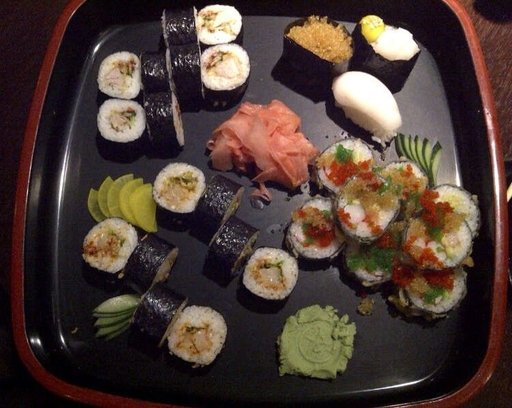

In [20]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all the image paths
# any image in train/test folder -> any image in pizza/steak/sushi folder -> any file
# in that folder that is a jpg
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class path name. Get parent folder (e.g. Sushi, steak, pizza)
image_class = random_image_path.parent.stem

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img
# Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
# Image class: sushi
# Image height: 408
# Image width: 512

(np.float64(-0.5), np.float64(511.5), np.float64(407.5), np.float64(-0.5))

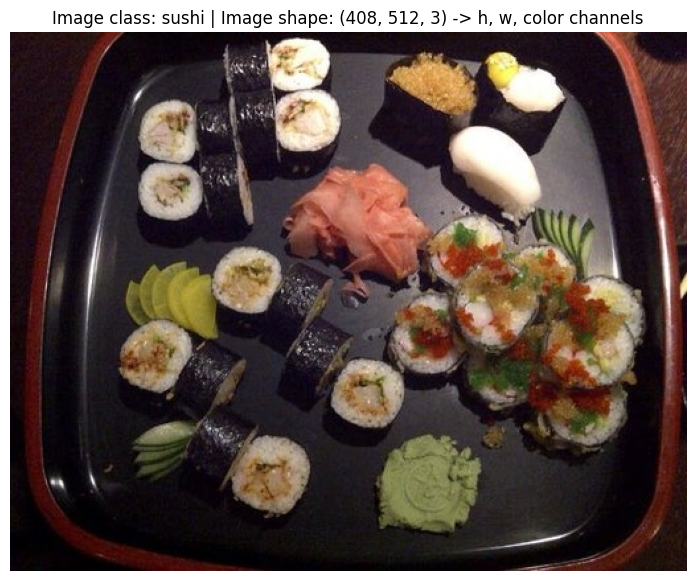

In [23]:
# Lets do it with matplotlib
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> h, w, color channels')
plt.axis(False)

In [26]:
# Transforming data
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [27]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize Images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal 50% of the time
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [30]:
data_transform(img).shape
#torch.Size([3, 64, 64])

torch.Size([3, 64, 64])

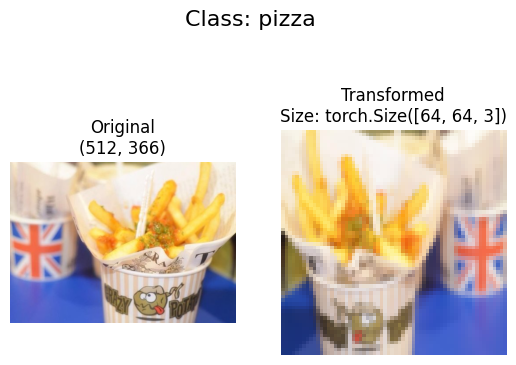

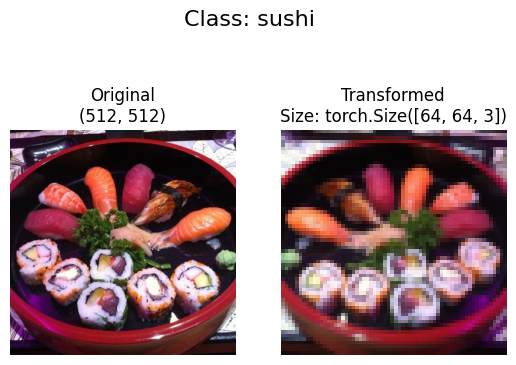

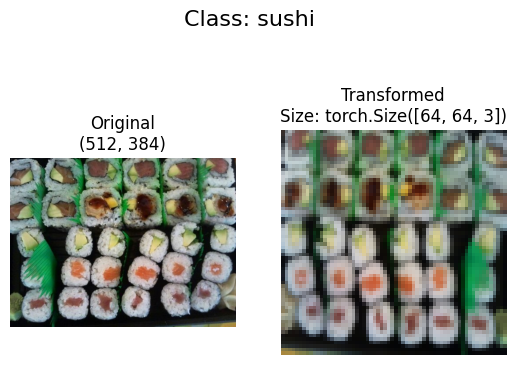

In [38]:
# Lets plot some reshaped images
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    # Selects random images from a path of images and loads/transforms them
    if seed:
        random.seed(seed)
    # from our random image paths earlier, pick n items
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:

        # Plot the OG image and the transform
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\n{f.size}')
            ax[0].axis('off')

            #Transform and plot target image
            # Recall our image is in C,H,W and matplotlib likes H,W,C
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis('off')

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_paths = image_path_list,
                        transform = data_transform,
                        n=3)

In [39]:
# Loading image data using ImageFolder to create datasets
# from our train and test data
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  # Transform func from earlier
                                  transform=data_transform,
                                  # don't transform labels
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data
# (Dataset ImageFolder
#      Number of datapoints: 225
#      Root location: data\pizza_steak_sushi\train
#      StandardTransform
#  Transform: Compose(
#                 Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
#                 RandomHorizontalFlip(p=0.5)
#                 ToTensor()
#             ),
#  Dataset ImageFolder
#      Number of datapoints: 75
#      Root location: data\pizza_steak_sushi\test
#      StandardTransform
#  Transform: Compose(
#                 Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
#                 RandomHorizontalFlip(p=0.5)
#                 ToTensor()
#             ))

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [40]:
# Get class names as list
class_names = train_data.classes
class_names
#['pizza', 'steak', 'sushi']

['pizza', 'steak', 'sushi']

In [41]:
# Check the lengths of our dataset
len(train_data), len(test_data)
#(225, 75)

(225, 75)

In [43]:
class_dict = train_data.class_to_idx
class_dict
#{'pizza': 0, 'steak': 1, 'sushi': 2}

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [46]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
img.shape, class_names[label]
#(torch.Size([3, 64, 64]), 'pizza')

(torch.Size([3, 64, 64]), 'pizza')

In [47]:
print(f'Image Tensor:\n{img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')
# Image Tensor:
# tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
#          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
#          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
#          ...,
#          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
#          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
#          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
#
#         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
#          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
#          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
#          ...,
#          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
#          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
#          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
#
#         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
#          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
#          [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.0902],
#          ...,
#          [0.1843, 0.1882, 0.1961,  ..., 0.1490, 0.1333, 0.1294],
#          [0.1804, 0.1843, 0.1922,  ..., 0.1255, 0.1137, 0.1098],
#          [0.1765, 0.1804, 0.1882,  ..., 0.1059, 0.0980, 0.1059]]])
# Image shape: torch.Size([3, 64, 64])
# Image datatype: torch.float32
# Image label: 0
# Label datatype: <class 'int'>

Image Tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64]) -> [C,H,W]
Image permute: torch.Size([64, 64, 3]) -> [H,W,C]


Text(0.5, 1.0, 'pizza')

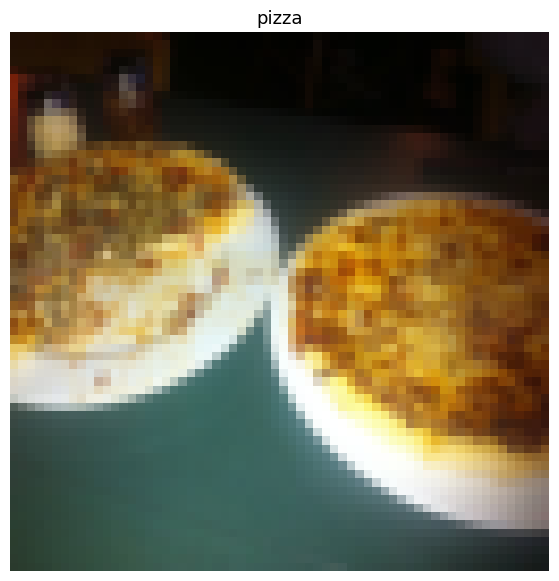

In [49]:
# reorder the dimensions
img_permute = img.permute(1,2,0)

print(f'Original shape: {img.shape} -> [C,H,W]')
print(f'Image permute: {img_permute.shape} -> [H,W,C]')

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=13)
# Original shape: torch.Size([3, 64, 64]) -> [C,H,W]
# Image permute: torch.Size([64, 64, 3]) -> [H,W,C]